In [1]:
import pyspark as ps
import pyspark.sql.functions as funcs
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

spark = (ps.sql.SparkSession.builder 
        .master("local[4]") 
        .appName("sparkSQL exercise") 
        .getOrCreate()
        )
sc = spark.sparkContext

In [2]:
def splitName(df, name = 'name',delim = ', '):
    split_col = funcs.split(df[name], delim)
    df = df.withColumn('State', split_col.getItem(0))
    df = df.withColumn('County', split_col.getItem(1))
    return df

In [3]:
dataD25 = spark.read.csv('data/Model_11.2.1_20201225_data.csv', header = True, comment = '#', inferSchema = True)
dataD25 = splitName(dataD25)
resultsD25 = spark.read.csv('data/Model_11.2.1_20201225_results.csv', header = True, comment = '#', inferSchema = True)
resultsD25 = splitName(resultsD25, name = 'Name')
dataJ01 = spark.read.csv('data/Model_11.2.1_20210101_data.csv', header = True, comment = '#', inferSchema = True)
dataJ01 = splitName(dataJ01)
resultsJ01 = spark.read.csv('data/Model_11.2.1_20210101_results.csv', header = True, comment = '#', inferSchema = True)
resultsJ01 = splitName(resultsJ01, name = 'Name')
dataJ15 = spark.read.csv('data/Model_11.2.1_20210115_data.csv', header = True, comment = '#', inferSchema = True)
dataJ15 = splitName(dataJ15)
resultsJ15 = spark.read.csv('data/Model_11.2.1_20210115_results.csv', header = True, comment = '#', inferSchema = True)
resultsJ15 = splitName(resultsJ15, name = 'Name')

In [4]:
dataD25_df = dataD25.createOrReplaceTempView('dataD25')
resultsD25_df = resultsD25.createOrReplaceTempView('resultsD25')
dataJ01_df = dataJ01.createOrReplaceTempView('dataJ01')
resultsJ01_df = resultsJ01.createOrReplaceTempView('resultsJ01')
dataJ15_df = dataJ15.createOrReplaceTempView('dataJ15')
resultsJ15_df = resultsJ15.createOrReplaceTempView('resultsJ15')

In [5]:
dataJ15.printSchema()

root
 |-- row: integer (nullable = true)
 |-- sid: string (nullable = true)
 |-- casrn: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- Spread: double (nullable = true)
 |-- Sick: double (nullable = true)
 |-- PctCases: double (nullable = true)
 |-- Cases: integer (nullable = true)
 |-- CountyCaseRate: double (nullable = true)
 |-- StateCaseRate: double (nullable = true)
 |-- PctDeaths: double (nullable = true)
 |-- Deaths: integer (nullable = true)
 |-- PctDeaths2: double (nullable = true)
 |-- CountyDeathRate: double (nullable = true)
 |-- StateDeathRate: double (nullable = true)
 |-- StatePctTested: double (nullable = true)
 |-- StateTestRate: double (nullable = true)
 |-- SVISocioeconomic: double (nullable = true)
 |-- SVIMinority: double (nullable = true)
 |-- SVIHousing: double (nullable = true)
 |-- PctBeds: double (nullable = true)
 |-- Mobility: double (nullable = true)
 |-- PctNoIns: double (nullable = true)
 |-- PctGE65: double (nullable = true)
 |-- Dayti

In [6]:
resultsJ15.printSchema()

root
 |-- ToxPi Score: double (nullable = true)
 |-- HClust Group: integer (nullable = true)
 |-- KMeans Group: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Source: string (nullable = true)
 |-- Infection Rate: Transmissible Cases!25!0xcc3333ff: double (nullable = true)
 |-- Infection Rate: Disease Spread!5!0xe64d4dff: double (nullable = true)
 |-- Pop Concentration: Pop Mobility!10!0x57b757ff: double (nullable = true)
 |-- Pop Concentration: Residential Density!10!0x5ced5cff: double (nullable = true)
 |-- Intervention: Social Distancing!10!0x4258c9ff: double (nullable = true)
 |-- Intervention: Testing!10!0x6079f7ff: double (nullable = true)
 |-- Health & Environment: Pop Demographics!10!0x6b0b9eff: double (nullable = true)
 |-- Health & Environment: Air Pollution!10!0x8e26c4ff: double (nullable = true)
 |-- Health & Environment: Age Distribution!10!0x9a42c8ff: double (nullable = true)
 |-- Health & Environment: Co-morbidities!10!0xb460e0ff: double (nullable = tr

In [7]:
dataJ15.take(1)

[Row(row=1, sid='-86.6441,32.5395', casrn=1001, name='Alabama, Autauga', Spread=0.174384236453202, Sick=15.9169799104333, PctCases=0.0912753367745184, Cases=5075, CountyCaseRate=1.01087308004023, StateCaseRate=1.00905300172201, PctDeaths=0.0108374384236453, Deaths=55, PctDeaths2=0.000989190841891333, CountyDeathRate=1.01370885629547, StateDeathRate=1.02267613693005, StatePctTested=0.409113292883548, StateTestRate=1.00492952282485, SVISocioeconomic=0.3631, SVIMinority=0.5947, SVIHousing=0.3741, PctBeds=0.00152874948292297, Mobility=1733.08, PctNoIns=7.1, PctGE65=14.6, DaytimePopDensity=76.0, PrematureDeath=8128.5911903, Smoking=0.1808155718, AirPollution=11.7, Diabetes=0.111, Traffic=88.457040416, DistancingGrade=5.0, Obesity=0.333, PctBlack=0.1934317728, PctNative=0.0048020719, State='Alabama', County='Autauga')]

In [8]:
def query(sql_query):
    result = spark.sql(sql_query)
    result.show()

In [9]:
def queryToPandas(sql_query):
    result = spark.sql(sql_query)
    asPandas = result.toPandas()
    return asPandas

In [67]:
def pandaPlot(sql_query, name = None, **plotArgs):
    queryToPandas(sql_query).plot(**plotArgs)
    plt.tight_layout()
    if name:
        plt.savefig(name)

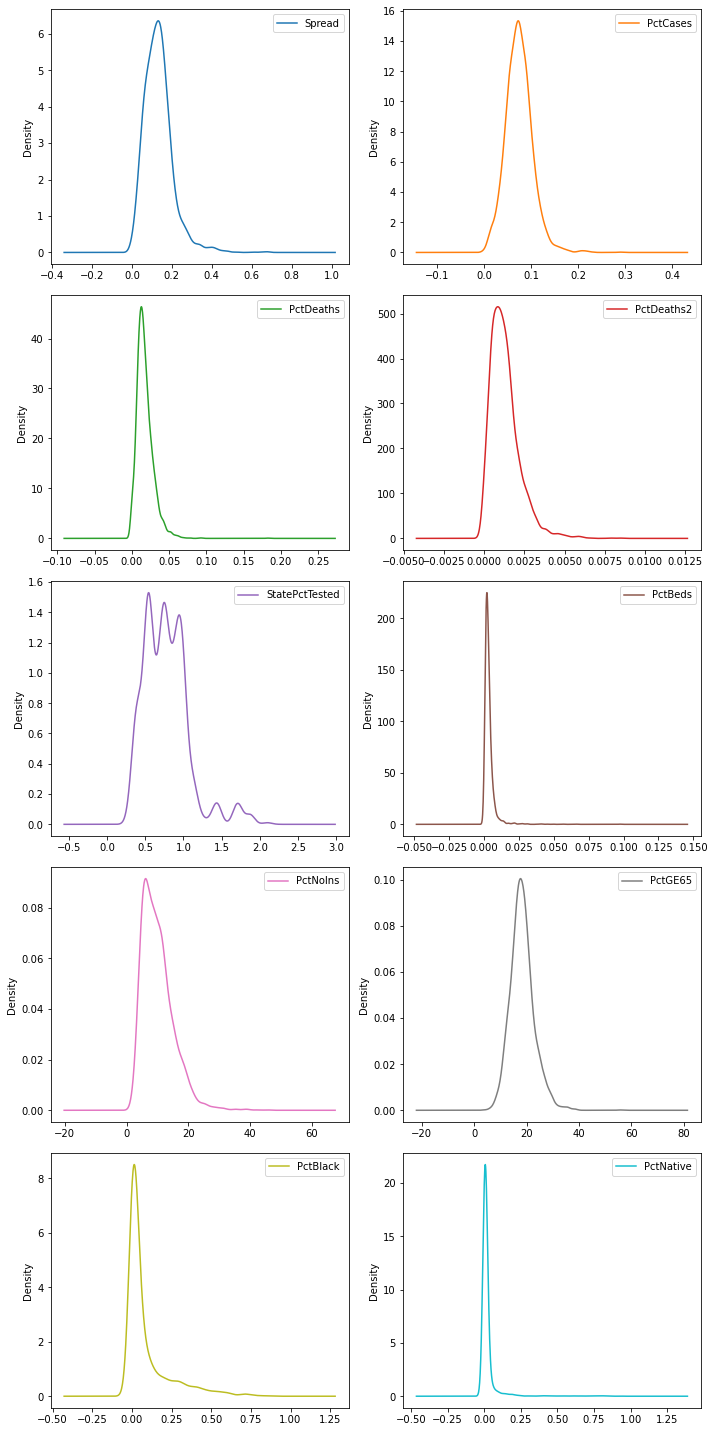

In [68]:
pandaPlot("""
SELECT
    Spread,
    PctCases,
    PctDeaths,
    PctDeaths2,
    StatePctTested,
    PctBeds,
    PctNoIns,
    PctGE65,
    PctBlack,
    PctNative
FROM
    dataJ15
""",**{'sharex':False,'kind' : 'kde', 'subplots': True, 'figsize': (10,20), 'layout':(-1,2)})


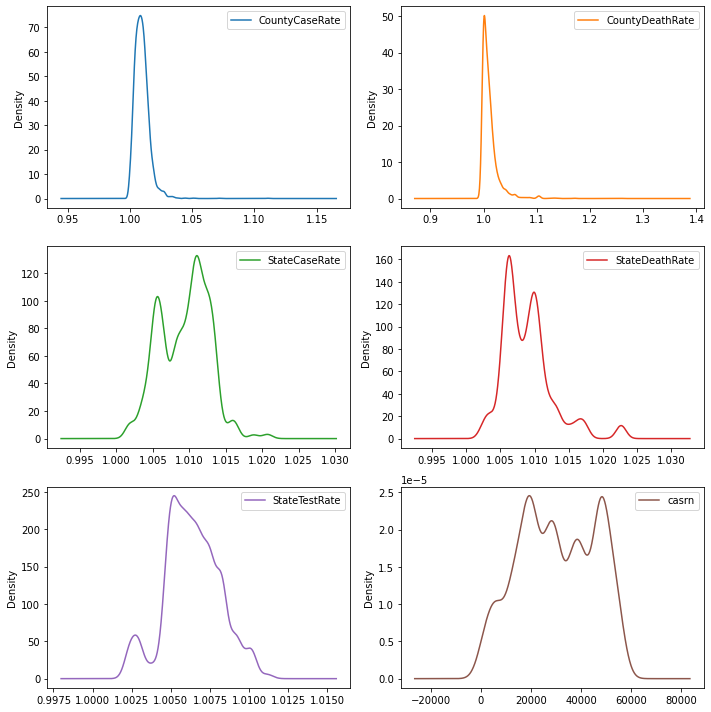

In [12]:
pandaPlot("""
SELECT
    CountyCaseRate,
    CountyDeathRate,
    StateCaseRate,
    StateDeathRate,
    StateTestRate,
    casrn
FROM
    dataJ15
""",**{'sharex':False,'kind' : 'kde', 'subplots': True, 'figsize': (10,10), 'layout':(-1,2)})

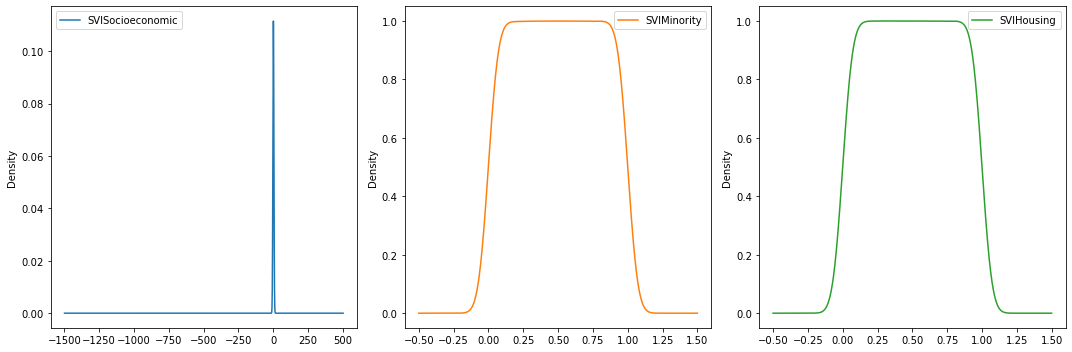

In [13]:
pandaPlot("""
SELECT
    SVISocioeconomic,
    SVIMinority,
    SVIHousing
FROM
    dataJ15
""",**{'sharex':False,'kind' : 'kde', 'subplots': True, 'figsize': (15,5), 'layout':(-1,3)})

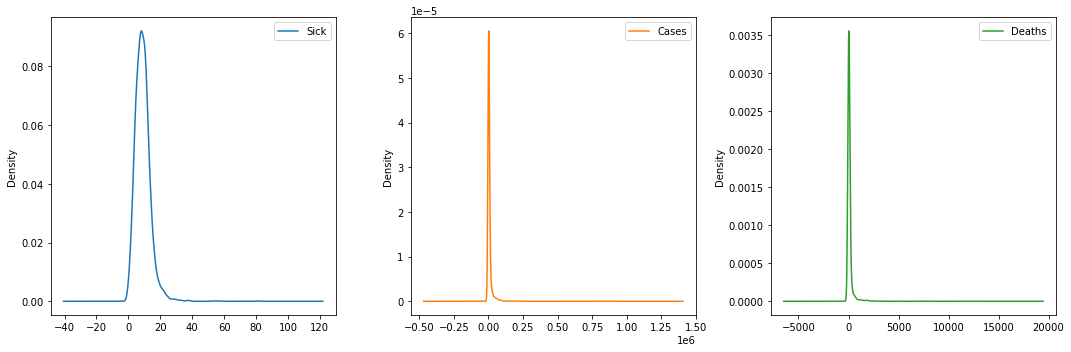

In [14]:
pandaPlot("""
SELECT
    Sick,
    Cases,
    Deaths
FROM
    dataJ15
""",**{'sharex':False,'kind' : 'kde', 'subplots': True, 'figsize': (15,5), 'layout':(-1,3)})

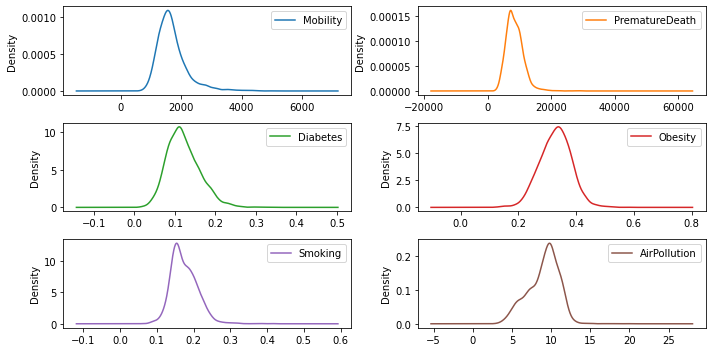

In [15]:
pandaPlot("""
SELECT
    Mobility,
    PrematureDeath,
    Diabetes,
    Obesity,
    Smoking,
    AirPollution
FROM
    dataJ15
""",**{'sharex':False,'kind' : 'kde', 'subplots': True, 'figsize': (10,5), 'layout':(-1,2)})

array([[<AxesSubplot:title={'center':'DistancingGrade'}>]], dtype=object)

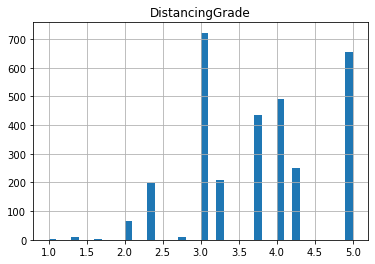

In [16]:
queryToPandas("""
SELECT
    DistancingGrade
FROM
    dataJ15
""").hist(bins = 40)

In [41]:
import folium
from folium import plugins
def map(weight = 'DaytimePopDensity', radius = 25, gradient = {0.1: 'navy', 0.2:'royalblue', 0.3:'cornflowerblue', 0.4:'deepskyblue', 0.5:'mediumspringgreen', 0.6: 'lime', 0.7: 'yellow', 0.8:'orange', 0.9:'orangered', 1: 'red'}):
    map_all=folium.Map(location=[39.8333333, -98.585522],zoom_start = 4,tiles = "openstreetmap")
    locations=queryToPandas("""
    SELECT
        sid
    FROM
        dataJ15
    """)['sid'].str.split(',',expand=True)
    locations.columns = ['Longitude','Latitude']
    locations['Weight'] = queryToPandas(f"""
    SELECT
        {weight}
    FROM
        dataJ15
    """)
    locations = locations[['Latitude','Longitude','Weight']]
    map_all.add_child(plugins.HeatMap(data=locations, radius = radius, gradient = gradient))
    return map_all

In [57]:
map(weight = 'pctNative',radius = 16)

<AxesSubplot:xlabel='State'>

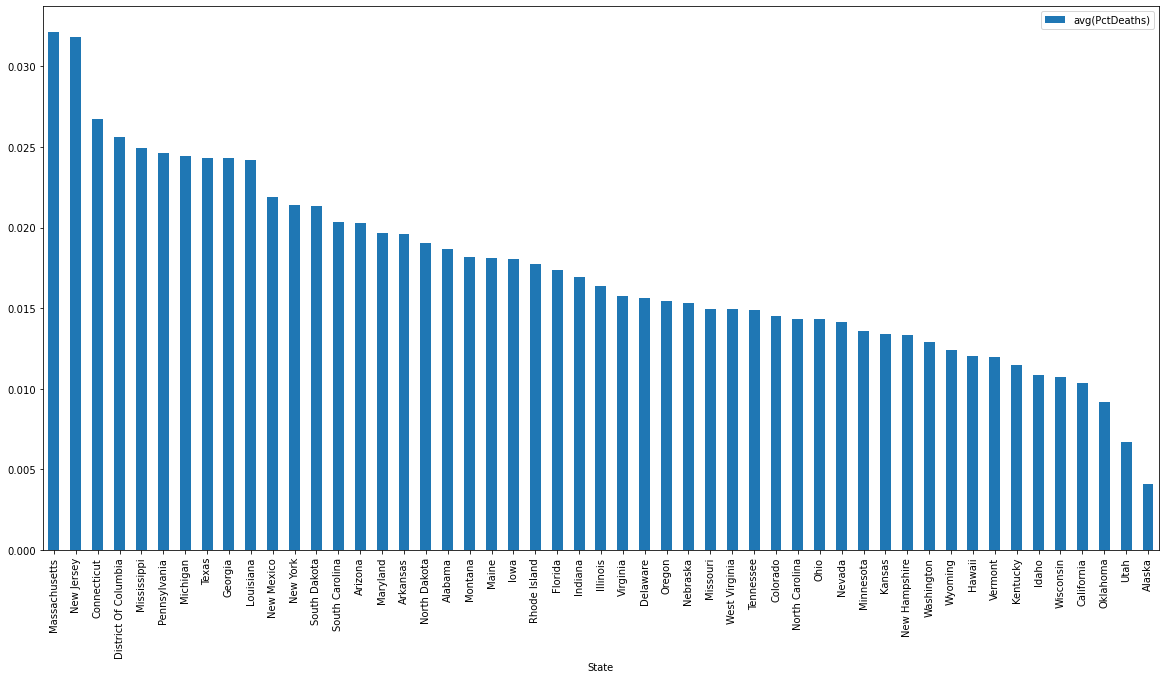

In [86]:
queryToPandas("""
SELECT
    State,
    AVG(PctDeaths)
FROM
    dataJ15
GROUP BY 
    State
""").set_index('State').sort_values(by='avg(PctDeaths)',ascending=False).plot(kind = 'bar', figsize= (20,10))

<AxesSubplot:xlabel='State'>

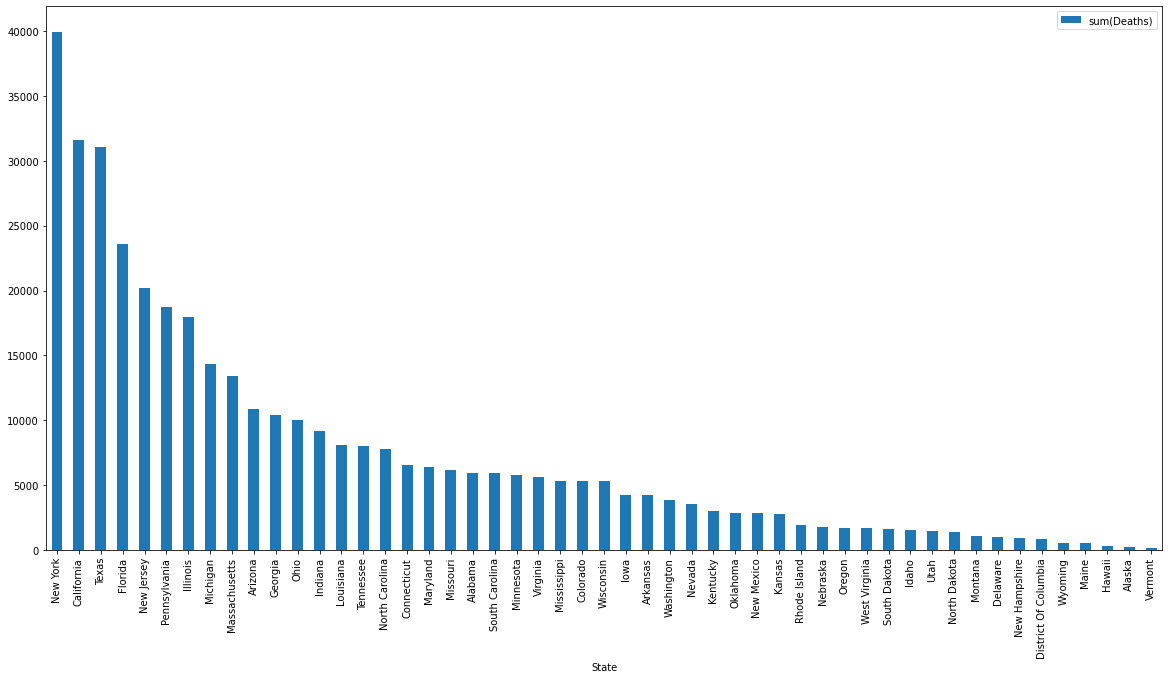

In [87]:
queryToPandas("""
SELECT
    State,
    SUM(Deaths)
FROM
    dataJ15
GROUP BY 
    State
""").set_index('State').sort_values(by='sum(Deaths)',ascending=False).plot(kind = 'bar', figsize= (20,10))

<AxesSubplot:xlabel='State'>

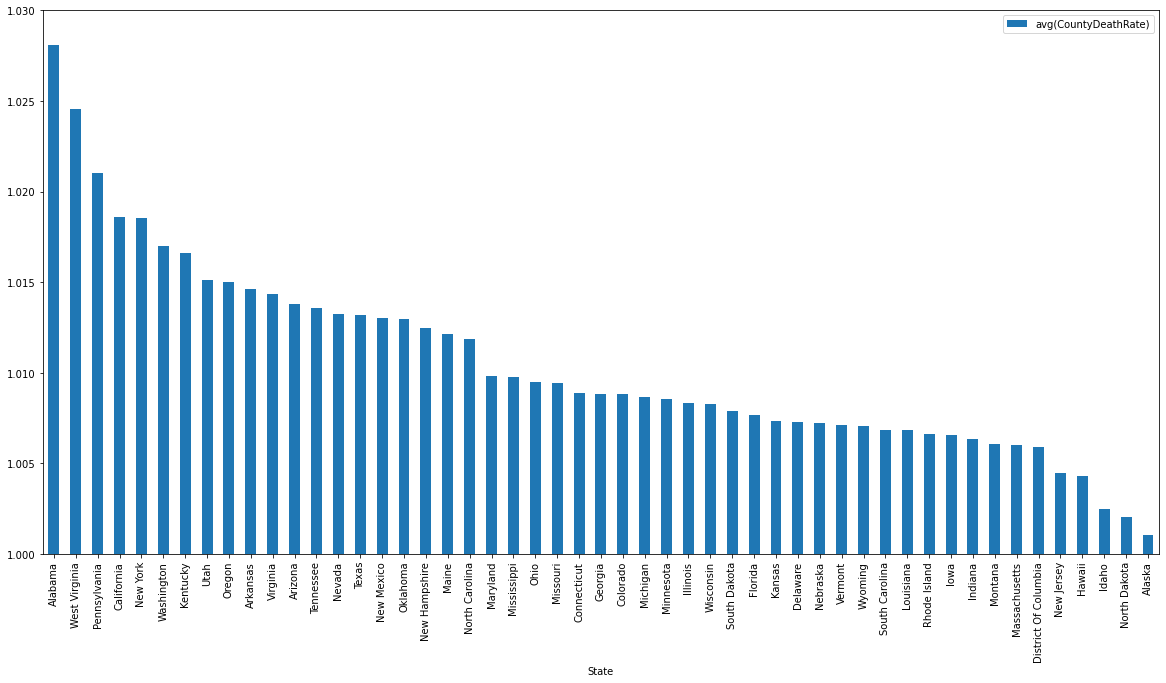

In [95]:
queryToPandas("""
SELECT
    State,
    AVG(CountyDeathRate)
FROM
    dataJ15
GROUP BY 
    State
""").set_index('State').sort_values(by='avg(CountyDeathRate)',ascending=False).plot(kind = 'bar', figsize= (20,10), ylim = ((1,1.03)))

<AxesSubplot:xlabel='State'>

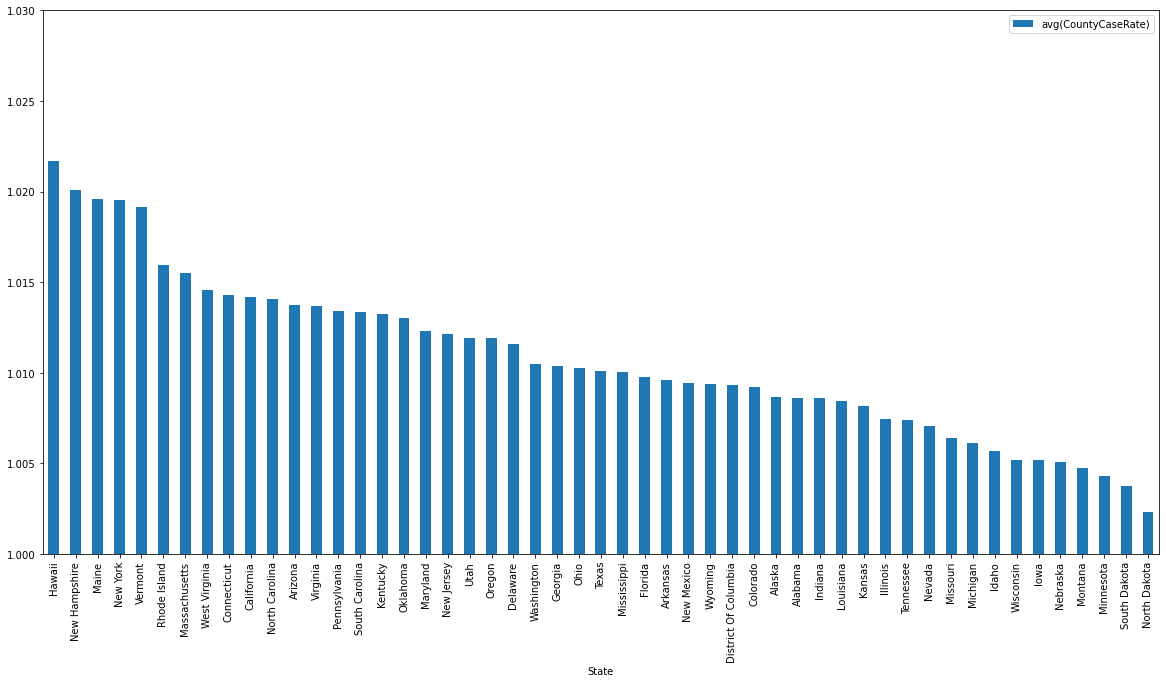

In [94]:
queryToPandas("""
SELECT
    State,
    AVG(CountyCaseRate)
FROM
    dataJ15
GROUP BY 
    State
""").set_index('State').sort_values(by='avg(CountyCaseRate)',ascending=False).plot(kind = 'bar', figsize= (20,10), ylim = ((1,1.03)))

<AxesSubplot:xlabel='State'>

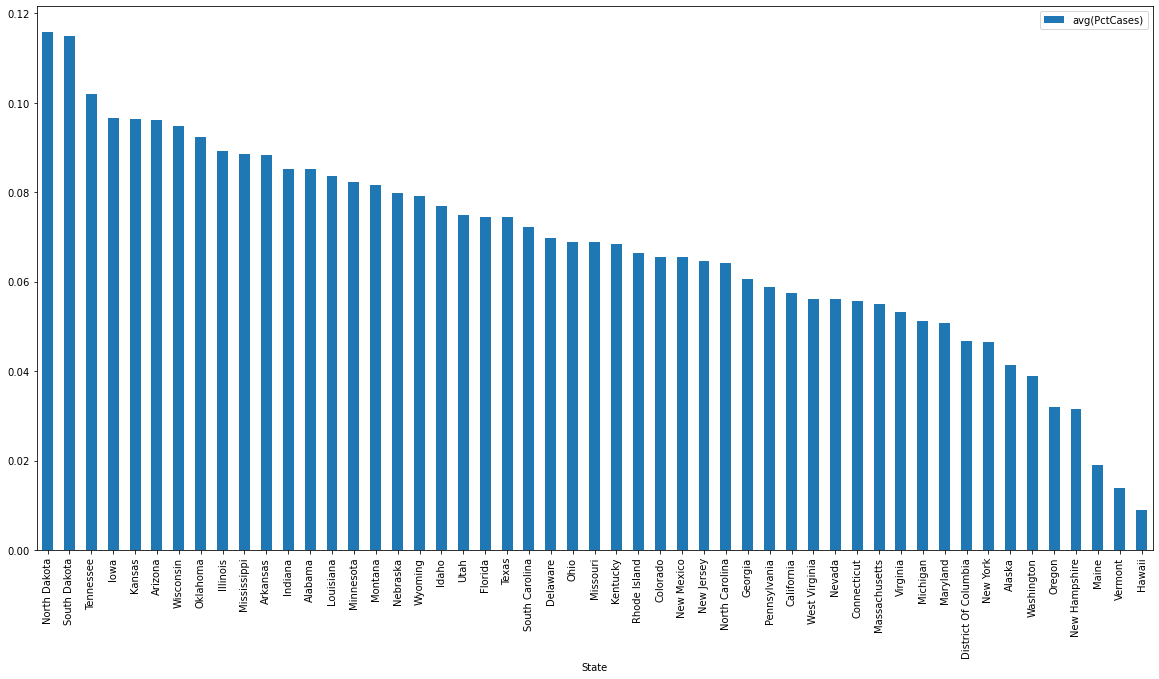

In [89]:
queryToPandas("""
SELECT
    State,
    AVG(PctCases)
FROM
    dataJ15
GROUP BY 
    State
""").set_index('State').sort_values(by='avg(PctCases)',ascending=False).plot(kind = 'bar', figsize= (20,10))

<AxesSubplot:xlabel='State'>

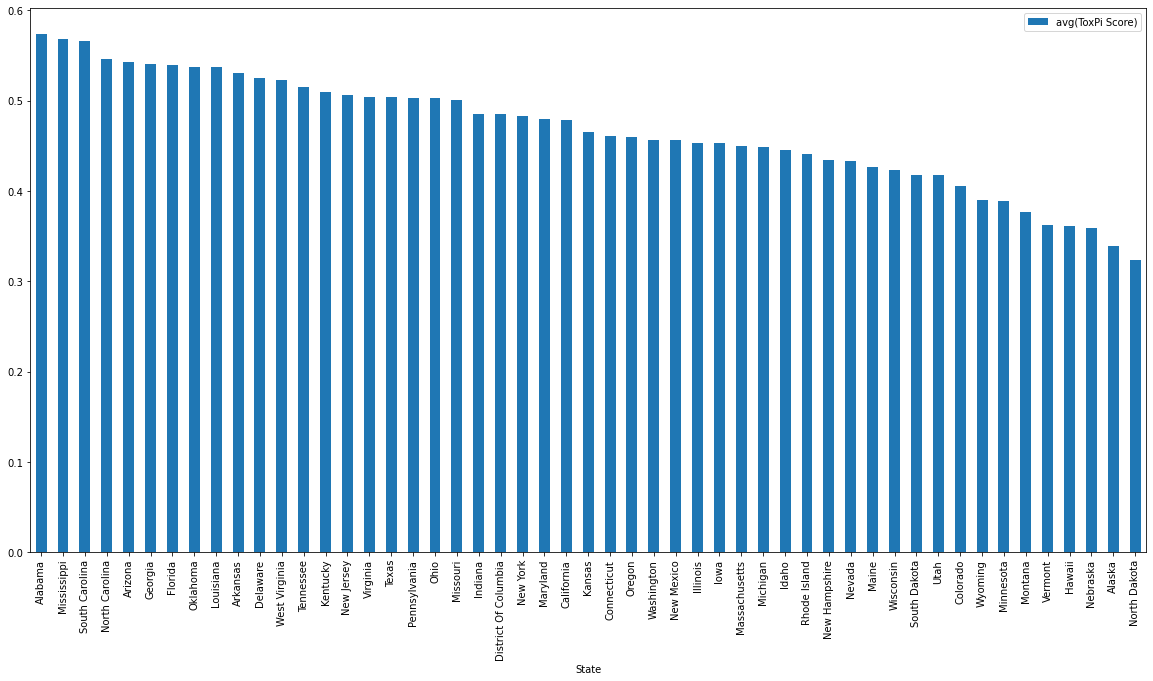

In [107]:
queryToPandas("""
SELECT
    dataJ15.State,
    AVG(`ToxPi Score`)
FROM
    dataJ15
FULL OUTER JOIN
    resultsJ15 ON dataJ15.name = resultsJ15.Name
GROUP BY 
    dataJ15.State
""").set_index('State').sort_values(by='avg(ToxPi Score)',ascending=False).plot(kind = 'bar', figsize= (20,10))